In [98]:
import numpy as np
import scipy.io as sio
from math import inf
import timeit
import matplotlib.pyplot as plt
from itertools import product

In [85]:
model = sio.loadmat('model.mat')
Z = model['Z']
XX = model['XX']
YY = model['YY']

In [317]:
def cost(x,y):
    L = 100
    c1 = 1e4/(3*L*8*np.sqrt(2*np.pi))*np.exp(-1/(3*L*8)*((x-13*4)**2+(y-11*4)**2))
    c2 = 1e2/(3*16*np.sqrt(2*np.pi))*np.exp(-1/(3*16)*((x-4*23)**2+(y-4*21)**2))
    return c1+c2

def g1(x,y):
    return 64-(x-4*7)**2-(y-4*12)**2

def g2(x,y):
    return 64-(x-4*13)**2-(y-4*18)**2

In [370]:
def astar(start,goal):
    N = 100
    nodes = list(product(range(N),repeat=2))
    closedSet = []
    openSet = [start]
    cameFrom = dict()
    gScore = dict()
    fScore = dict()
    for n in nodes:
        gScore[n] = inf
        fScore[n] = inf
    gScore[tuple(start)] = 0
    fScore[tuple(start)] = 100
    
    while len(openSet)!=0:
        scores = {tuple(k): fScore[tuple(k)] for k in openSet}
        current = list(min(scores, key=scores.get))
        if current == goal:
            return reconstruct_path(cameFrom, current)
        
        openSet.remove(current)
        closedSet.append(current)
        
        for neigh in neighbors(current,N):
            if neigh in closedSet:
                continue
            if neigh not in openSet:
                openSet.append(neigh)
            
            tentative_gScore = gScore[tuple(current)] + dist_between(current,neigh,Z)
            if tentative_gScore >= gScore[tuple(neigh)]:
                continue
            cameFrom[tuple(neigh)] = current
            gScore[tuple(neigh)] = tentative_gScore
            fScore[tuple(neigh)] = gScore[tuple(neigh)]
    return "Failure"

def reconstruct_path(cameFrom, current):
    total_path = [current]
    while tuple(current) in cameFrom.keys():
        current = cameFrom[tuple(current)]
        total_path.append(current)
    return np.array(total_path)

def neighbors(current,N):
    nn = [list(np.add(current,[0,1])),list(np.add(current,[1,1])),
          list(np.add(current,[1,0])),list(np.add(current,[1,-1])),
          list(np.add(current,[0,-1])),list(np.add(current,[-1,-1])),
          list(np.add(current,[-1,0])),list(np.add(current,[-1,1]))]
    #remove neighbors not in map
    nn = [neigh for neigh in nn if neigh[0]>=0 and neigh[0]<N and neigh[1]>=0 and neigh[1]<N]
    #remove neighbors within constraints
    nn = [neigh for neigh in nn if g1(neigh[0],neigh[1])<0 and g2(neigh[0],neigh[1])<0]
    return nn

def dist_between(current,neigh,Z):
    return np.linalg.norm(np.subtract(current,neigh)) + 1.15*cost(neigh[0],neigh[1])

In [371]:
start = [0,0]
goal = [99,99]
start_time = timeit.default_timer()
optimal_path = astar(start,goal)
elapsed = timeit.default_timer() - start_time
print('elapsed time: ',elapsed)

elapsed time:  15.377227633797702


## Plot path

In [254]:
t = np.linspace(0,2*np.pi,500)
cx1 = 4*7+8*np.cos(t);
cy1 = 4*12+8*np.sin(t);
cx2 = 4*13+8*np.cos(t);
cy2 = 4*18+8*np.sin(t);

In [318]:
[XX,YY] = np.meshgrid(np.linspace(0,100,100),np.linspace(0,100,100))
for i in range(len(XX)):
    for j in range(len(XX)):
        Z[i,j]=cost(XX[i,j],YY[i,j])

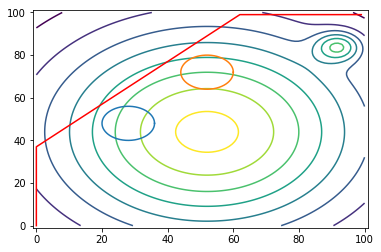

In [372]:
plt.figure
plt.contour(XX,YY,Z)
plt.plot(optimal_path[:,0],optimal_path[:,1],'r')
plt.plot(cx1,cy1)
plt.plot(cx2,cy2)
plt.axis([-1,101,-1,101])
plt.show()